# Week 5 Assignment By Ashutosh Sahoo

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [33]:
df = pd.read_csv('titanic.csv')

In [34]:
###EDA(Explarotary Data Analysis)
print("Lets See the data Ovieview:")
print(df.info())

Lets See the data Ovieview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [35]:
# lets drop waste columns that are not useful for our model
cols_to_drop = ['Name', 'Ticket', 'Cabin']
df.drop(cols_to_drop, axis=1, inplace=True)

In [37]:
# lets fill the  missing values of age with its median
df['Age'].fillna(df['Age'].median(), inplace=True)

In [38]:
# lets fill the embarked column  with the common values
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [40]:
# now lets convert categorical features to dummy variables
dummies = pd.get_dummies(df[['Pclass', 'Sex', 'Embarked']], drop_first=True)
df = pd.concat([df, dummies], axis=1)
df.drop(['Pclass', 'Sex', 'Embarked'], axis=1, inplace=True)

In [41]:
# now lets normalize numerical features age and fare
df['Age'] = (df['Age'] - df['Age'].mean()) / df['Age'].std()
df['Fare'] = (df['Fare'] - df['Fare'].mean()) / df['Fare'].std()

In [42]:
# Now lets seperate the target variableand  survived  from the features
X = df.drop('Survived', axis=1)
y = df['Survived']

In [43]:
#lets check our data once 
df.head(5)

,PassengerId,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,-0.565419,1,0,-0.502163,1,0,1
1,2,1,0.663488,1,0,0.786404,0,0,0
2,3,1,-0.258192,0,0,-0.488580,0,0,1
3,4,1,0.433068,1,0,0.420494,0,0,1
4,5,0,0.433068,0,0,-0.486064,1,0,1


In [44]:
# now final step lets split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [45]:
# let's see the final data overview
print(X_train.info())
print(y_train.shape)
print(X_test.info())
print(y_test.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 857 to 684
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  623 non-null    int64  
 1   Age          623 non-null    float64
 2   SibSp        623 non-null    int64  
 3   Parch        623 non-null    int64  
 4   Fare         623 non-null    float64
 5   Sex_male     623 non-null    uint8  
 6   Embarked_Q   623 non-null    uint8  
 7   Embarked_S   623 non-null    uint8  
dtypes: float64(2), int64(3), uint8(3)
memory usage: 31.0 KB
None
(623,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 268 entries, 495 to 64
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  268 non-null    int64  
 1   Age          268 non-null    float64
 2   SibSp        268 non-null    int64  
 3   Parch        268 non-null    int64  
 4   Fare         268 non-null    float64
 5

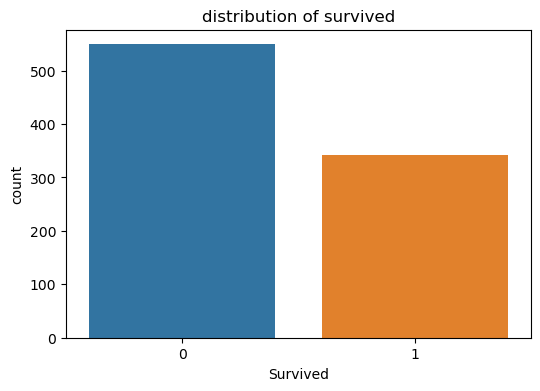

In [46]:
# lets visualise the things now
# distrubution vs  survived
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('distribution of survived')
plt.show()

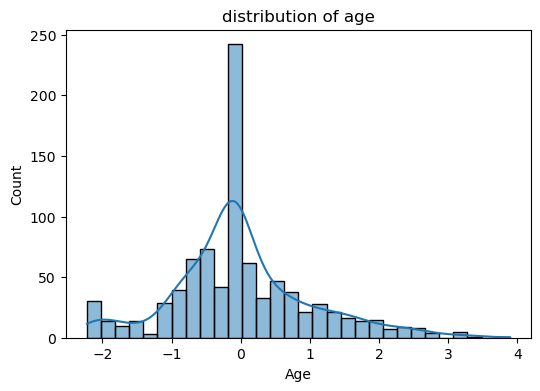

In [47]:
# distribution of age after filling missing values
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('distribution of age')
plt.show()

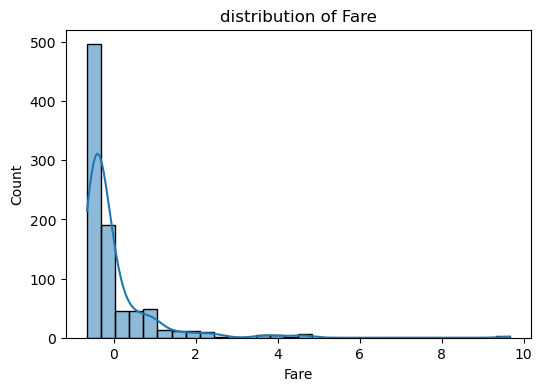

In [48]:
# distrubution of fare after normalization
plt.figure(figsize=(6, 4))
sns.histplot(df['Fare'], bins=30, kde=True)
plt.title('distribution of Fare')
plt.show()

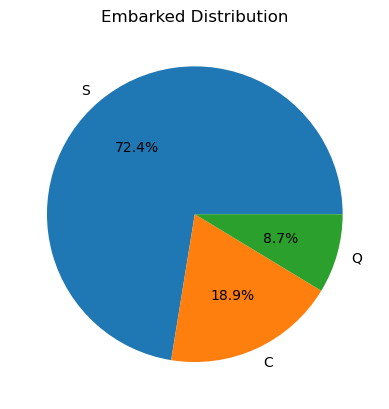

In [51]:
# Pie chart: Embarked distribution
embarked_counts = titanic_df['Embarked'].value_counts()
plt.pie(embarked_counts.values, labels=embarked_counts.index, autopct='%1.1f%%')
plt.title('Embarked Distribution')
plt.show()

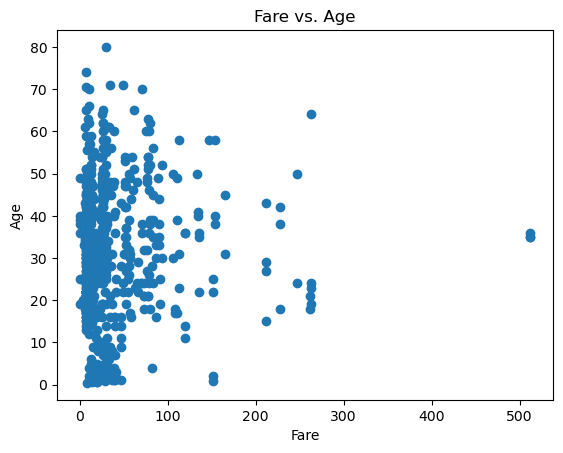

In [58]:
#Scatter plot: Fare vs. Age
plt.scatter(titanic_df['Fare'], titanic_df['Age'])
plt.xlabel('Fare')
plt.ylabel('Age')
plt.title('Fare vs. Age')
plt.show()

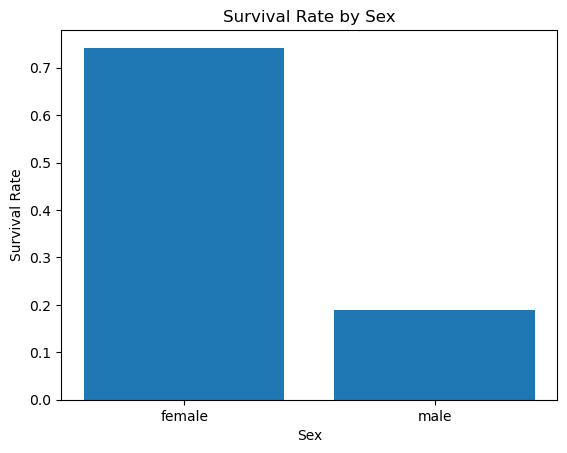

In [53]:
#Survival Rate by Sex
survival_by_sex = titanic_df.groupby('Sex')['Survived'].mean()
plt.bar(survival_by_sex.index, survival_by_sex.values)
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Sex')
plt.show()

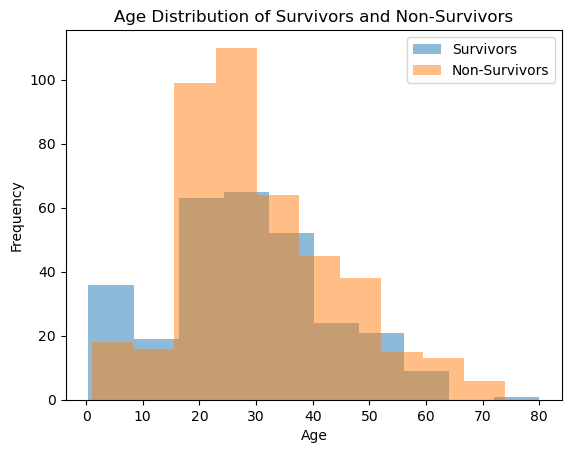

In [55]:
# Age Distribution of Survivors and Non-Survivors
survivors = titanic_df[titanic_df['Survived'] == 1]
non_survivors = titanic_df[titanic_df['Survived'] == 0]

plt.hist(survivors['Age'], alpha=0.5, label='Survivors')
plt.hist(non_survivors['Age'], alpha=0.5, label='Non-Survivors')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend()
plt.show()